In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

pd.options.display.max_columns = 50
pd.options.display.max_rows = 500

import matplotlib
matplotlib.rc("font", family = "AppleGothic")
matplotlib.rc("axes", unicode_minus = "False")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [3]:
train=pd.read_csv("Desktop/phthon/Kaggle/titanic/train.csv",index_col="PassengerId")
test=pd.read_csv("Desktop/phthon/Kaggle/titanic/test.csv",index_col="PassengerId")
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


# preprocessing

In [4]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 1)Sex

In [5]:
# 이 타이타닉에서 sex는 매우 중요함으로 이를 숫자로 변환시켜서 넣는다

train.loc[train["Sex"]=="male","Sex2"]=0
train.loc[train["Sex"]=="female","Sex2"]=1
test.loc[test["Sex"]=="male","Sex2"]=0
test.loc[test["Sex"]=="female","Sex2"]=1
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0


In [7]:
test.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0


### 2)Embarked

In [8]:
# Embarked는 3개 뿐이고 이 것이 영향을 주기 때문에 넣어주는 것이 맞다.

pd.pivot_table(index="Embarked",values="SibSp",data=test)

,SibSp
Embarked,
C,0.421569
Q,0.195652
S,0.500000


In [9]:
train["Embarked_C"]=train["Embarked"]=="C"
train["Embarked_Q"]=train["Embarked"]=="Q"
train["Embarked_S"]=train["Embarked"]=="S"
print(train.shape)
train.head(2)

(891, 15)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,True,False,False


In [10]:
test["Embarked_C"]=test["Embarked"]=="C"
test["Embarked_Q"]=test["Embarked"]=="Q"
test["Embarked_S"]=test["Embarked"]=="S"
print(test.shape)
test.head(2)

(418, 14)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,False,True,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,False,False,True


### 3)Age

In [11]:
train.loc[train["Age"].isnull(),"Age"]=0
train.head(6)
train.loc[train["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,


In [12]:
test.loc[test["Age"].isnull(),"Age"]=0
test.loc[test["Age"].isnull()]
print(test.shape)
test.head(6)
test.loc[test["Age"].isnull()]

(418, 14)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,


### 4)Fare

In [13]:
# fare 가격에 따른 영향이 있을 것으로 보여서 nan을 제거해준다

test.loc[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0,False,False,True


In [15]:
test.loc[test["Fare"].isnull(),"Fare"]=0
test.loc[test["Fare"].isnull()]
test.head() 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,False,True,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,False,False,True
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,False,True,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,False,False,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,False,False,True


# Exercising

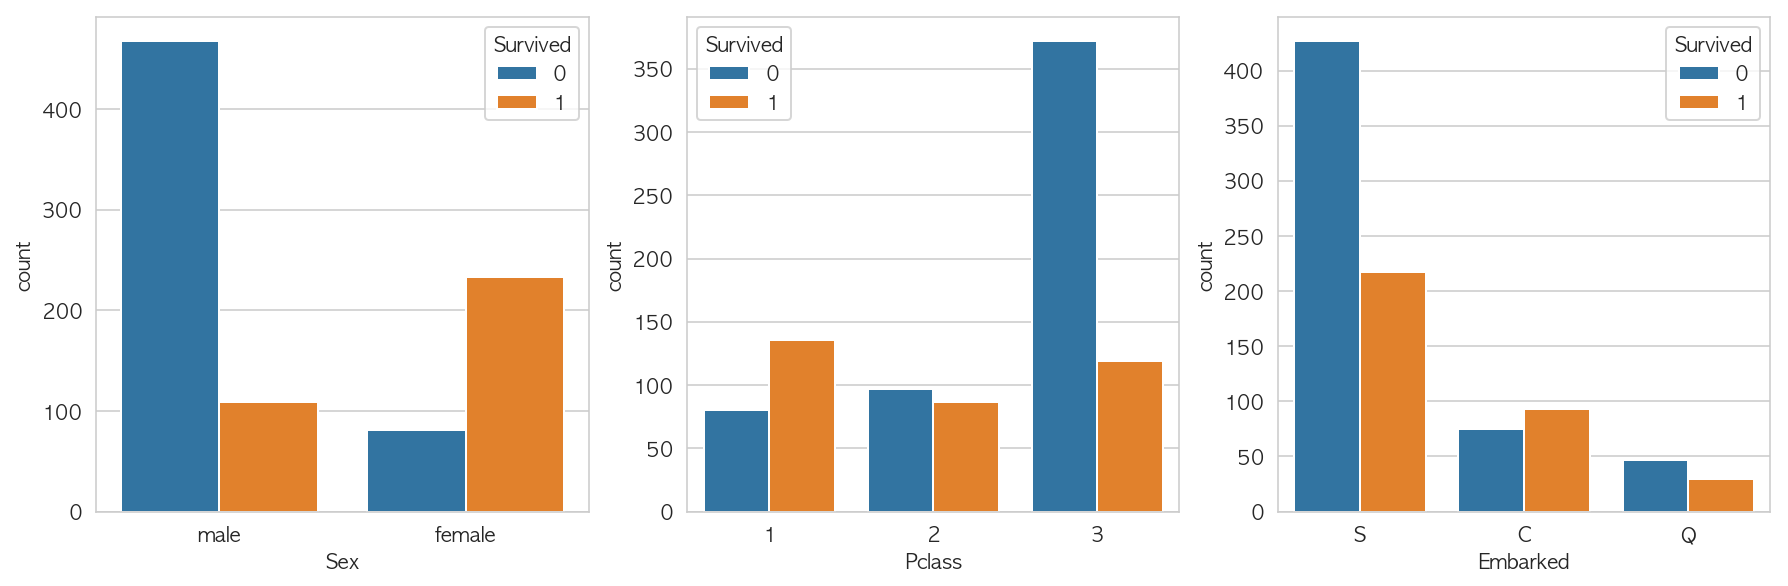

In [16]:
# 남자가 죽은 숫자가 여성보다 월등히 많은 관계로 성비율을 매우 중요하다고 볼 수 있다
# 클래스별로 3번이 특히 남성의 0 횟수가 많고 / embarked의 경우 Q는 오히려 남성이 더 많이 살았음을 알 수 있다

# 이 모든 것들은 필요한 자료라고 판단되어 적용한다
fig=plt.figure(figsize=[15,10])
ax1=fig.add_subplot(2,3,1)
ax1=sns.countplot(x="Sex",hue="Survived",data=train)

ax1=fig.add_subplot(2,3,2)
ax1=sns.countplot(x="Pclass",hue="Survived",data=train)

ax1=fig.add_subplot(2,3,3)
ax1=sns.countplot(x="Embarked",hue="Survived",data=train)

In [17]:
# 집중적으로 살펴보면 생존율을 좀더 자세히 볼 수 있다
# 이 둘을 전부 적용하면 이 생존율에 맞춰서 적용이 될 수 있다고 본다
pd.pivot_table(index=["Sex","Pclass","Embarked"],values="Survived",data=train)

Survived
Sex    Pclass Embarked          
female 1      C         0.976744
              Q         1.000000
              S         0.958333
       2      C         1.000000
              Q         1.000000
              S         0.910448
       3      C         0.652174
              Q         0.727273
              S         0.375000
male   1      C         0.404762
              Q         0.000000
              S         0.354430
       2      C         0.200000
              Q         0.000000
              S         0.154639
       3      C         0.232558
              Q         0.076923
              S         0.128302

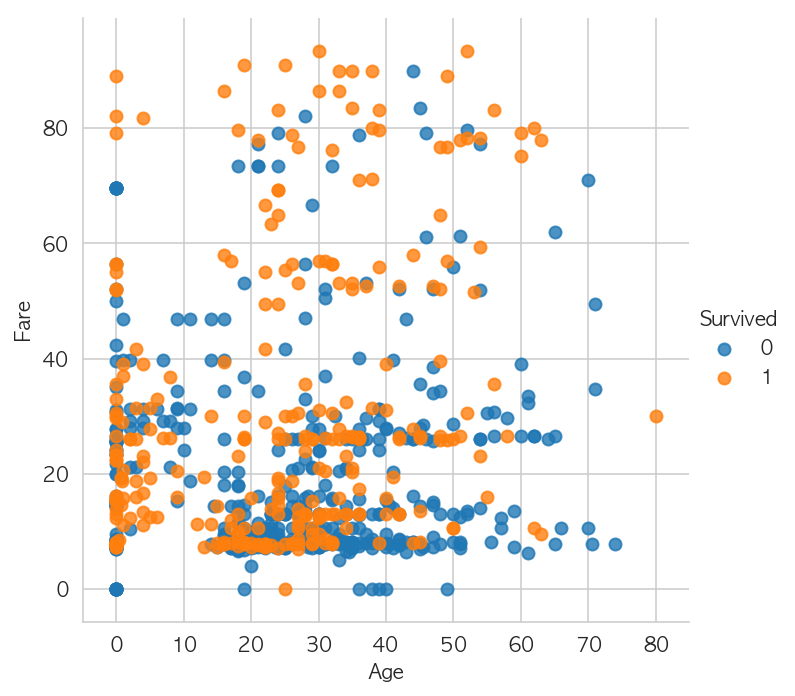

In [18]:
# 분산도를 조사해본결과 
# o~10세 중 20fare 이하인 사람들은 거의 다 1 - > 저요금을 이용한 고객들의 경우 아이들위주로 살렸을 가능성이 높다
# 60세 이후로는 대부분 0을 가르킨다 -> 대부분 탈출하지 못했을 거라는 의미임

train2=train.loc[train["Fare"]<100]
sns.lmplot(x="Age",y="Fare",hue="Survived",data=train2,fit_reg=None)

### Familly

In [19]:
train["Family"]=train["SibSp"]+train["Parch"]+1
test["Family"]=test["SibSp"]+test["Parch"]+1

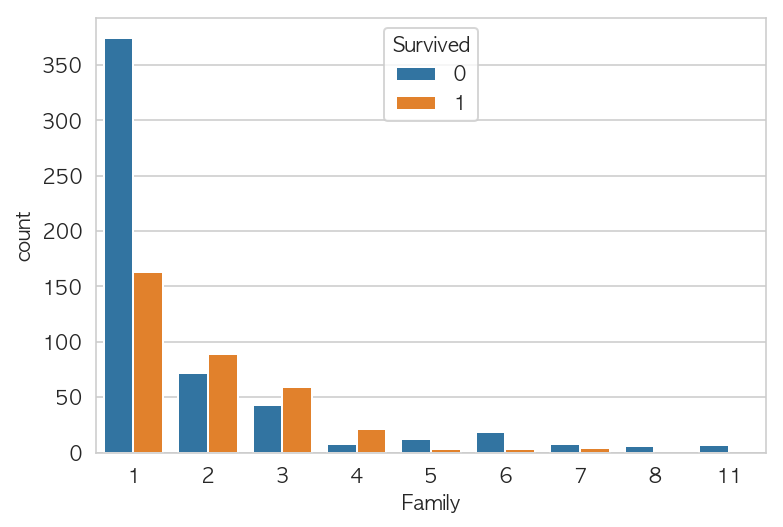

In [20]:
# 같이 탑승한 가족 및 본인 숫자를 더했을 때 어떤 결과가 나오는지 살펴보고자 한다 
# 현재 이와같은 결과를 보았을 때 1인가구(혼자탑승) 수가 많고 그 사람들은 대부분 0의 비율이 높다고 볼 수 있다
# 반면에 2,3,4,5는 오히려 산 사람이 많다 
# 이는 변수로 작용할 가능성이 있기 때문에 묶어서 적용해보기로 한다
sns.countplot(x="Family",hue="Survived",data=train)

In [21]:
train.loc[train["Family"]<12,"FamilySize"]="Big"
train.loc[train["Family"]<5,"FamilySize"]="Nuclear"
train.loc[train["Family"]<2,"FamilySize"]="Single"

In [22]:
train["Big"]=train["FamilySize"]=="Big"
train["Nuclear"]=train["FamilySize"]=="Nuclear"
train["Single"]=train["FamilySize"]=="Single"

train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S,Family,FamilySize,Big,Nuclear,Single
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,False,False,True,2,Nuclear,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,True,False,False,2,Nuclear,False,True,False


In [23]:
# Nuclear, 즉 2,3,4,5인 가구의 경우 생존확률이 57프로 정도 되기 때문에 이를 적용시켜줄 필요가 있다 
pd.pivot_table(index="FamilySize",values="Survived",data=train)

,Survived
FamilySize,
Big,0.161290
Nuclear,0.578767
Single,0.303538


In [24]:
test.loc[test["Family"]<12,"FamilySize"]="Big"
test.loc[test["Family"]<5,"FamilySize"]="Nuclear"
test.loc[test["Family"]<2,"FamilySize"]="Single"

In [25]:
test["Big"]=test["FamilySize"]=="Big"
test["Nuclear"]=test["FamilySize"]=="Nuclear"
test["Single"]=test["FamilySize"]=="Single"

test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S,Family,FamilySize,Big,Nuclear,Single
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,False,True,False,1,Single,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,False,False,True,2,Nuclear,False,True,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,False,True,False,1,Single,False,False,True
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,False,False,True,1,Single,False,False,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,False,False,True,3,Nuclear,False,True,False


### Name

In [26]:
# 이름이 뒤죽박죽인데 그 영향력이 있을 것이라고 판단하고 적용해본다 
# 먼저 unique를 통해 성별 및 직함을 파악해본다 
def newname(name):
    return name.split(",")[1].split(".")[0]

test["Name"].apply(newname).unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [27]:
# 분석결과 나머지 이름은 그 숫자가 상대적으로 적기에 배제하고 나머지 5숫자만 분석해보기로 한다 
# 이 5개 숫자를 별도로 빼내서 적용해본다 
train.loc[train["Name"].str.contains("Mr"),"Profile"]="Mr"
train.loc[train["Name"].str.contains("Mrs"),"Profile"]="Mrs"
train.loc[train["Name"].str.contains("Miss"),"Profile"]="Miss"
train.loc[train["Name"].str.contains("Master"),"Profile"]="Master"
train.loc[train["Name"].str.contains("Ms"),"Profile"]="Ms"

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S,Family,FamilySize,Big,Nuclear,Single,Profile
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,False,False,True,2,Nuclear,False,True,False,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,True,False,False,2,Nuclear,False,True,False,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,False,False,True,1,Single,False,False,True,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,False,False,True,2,Nuclear,False,True,False,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,False,False,True,1,Single,False,False,True,Mr


In [28]:
test.loc[test["Name"].str.contains("Mr"),"Profile"]="Mr"
test.loc[test["Name"].str.contains("Mrs"),"Profile"]="Mrs"
test.loc[test["Name"].str.contains("Miss"),"Profile"]="Miss"
test.loc[test["Name"].str.contains("Master"),"Profile"]="Master"
test.loc[test["Name"].str.contains("Ms"),"Profile"]="Ms"

test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2,Embarked_C,Embarked_Q,Embarked_S,Family,FamilySize,Big,Nuclear,Single,Profile
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,False,True,False,1,Single,False,False,True,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,False,False,True,2,Nuclear,False,True,False,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,False,True,False,1,Single,False,False,True,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,False,False,True,1,Single,False,False,True,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,False,False,True,3,Nuclear,False,True,False,Mrs


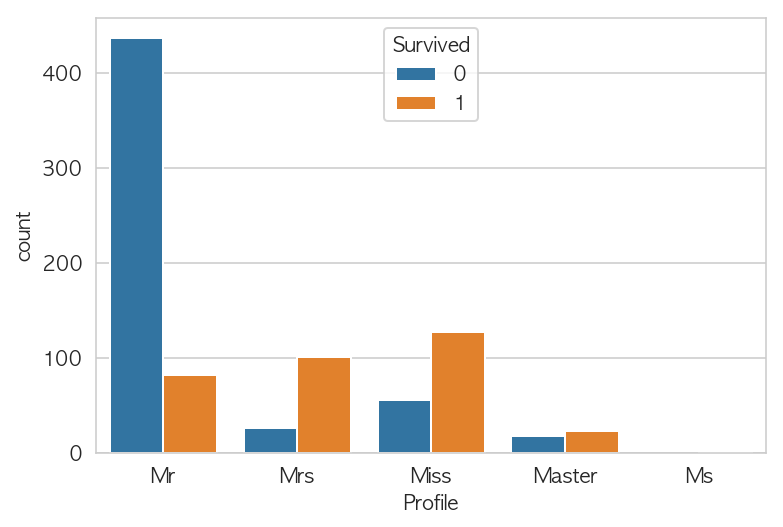

In [29]:
# 다른것은 별다른 특이사항이 없다 
# mr는 남자인데 이미 성별에서 0의 비율이 더 높았고 / 여성 역시 1이 더 높았기 때문에 mrs, miss 등도 별다른 이슈가 못된다

# 다만 master는 변수가 될 수 있는 자료라고 생각이 된다
# master는 보통 남자에게 붙여지는 칭호인데 남자면 0이 더 높아야 하는데 이것은 1이 더 높다 즉 master에서 생존할 남성확률이 50%가 넘는다는 것
# 그래서 이 master만 따로 적용해야할 필요성이 있다 
sns.countplot(x="Profile",hue="Survived",data=train)

In [33]:
train["Master"]=train["Profile"]=="Master"
test["Master"]=test["Profile"]=="Master"


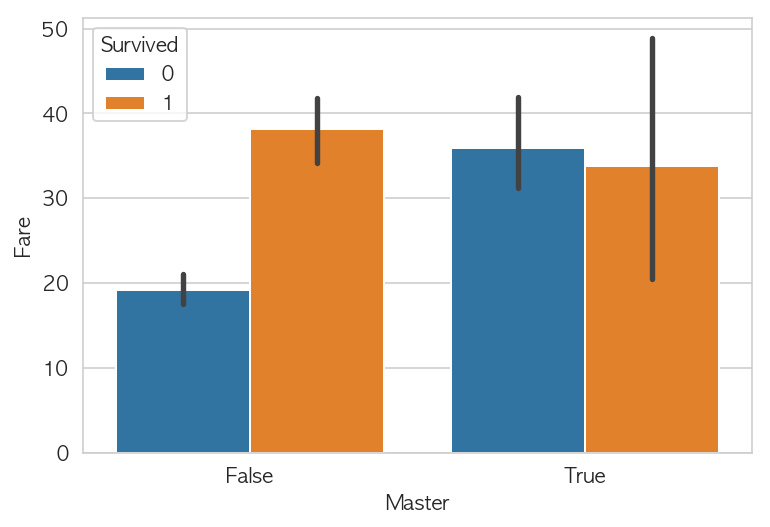

In [34]:
# 적용후 확인해보았을 때 true부분에서 더 높음을 알 수 있다 
train3=train.loc[train["Fare"]<200]
sns.barplot(x="Master",y="Fare",hue="Survived",data=train3)

# Preparation

In [35]:
feature_names=["Sex2","Pclass","Embarked_C","Embarked_Q","Embarked_S","Fare","Nuclear","Big","Single","Master"]
label_names=["Survived"]

x_train=train[feature_names]
y_train=train[label_names]
x_test=test[feature_names]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(891, 10)
(891, 1)
(418, 10)


In [36]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

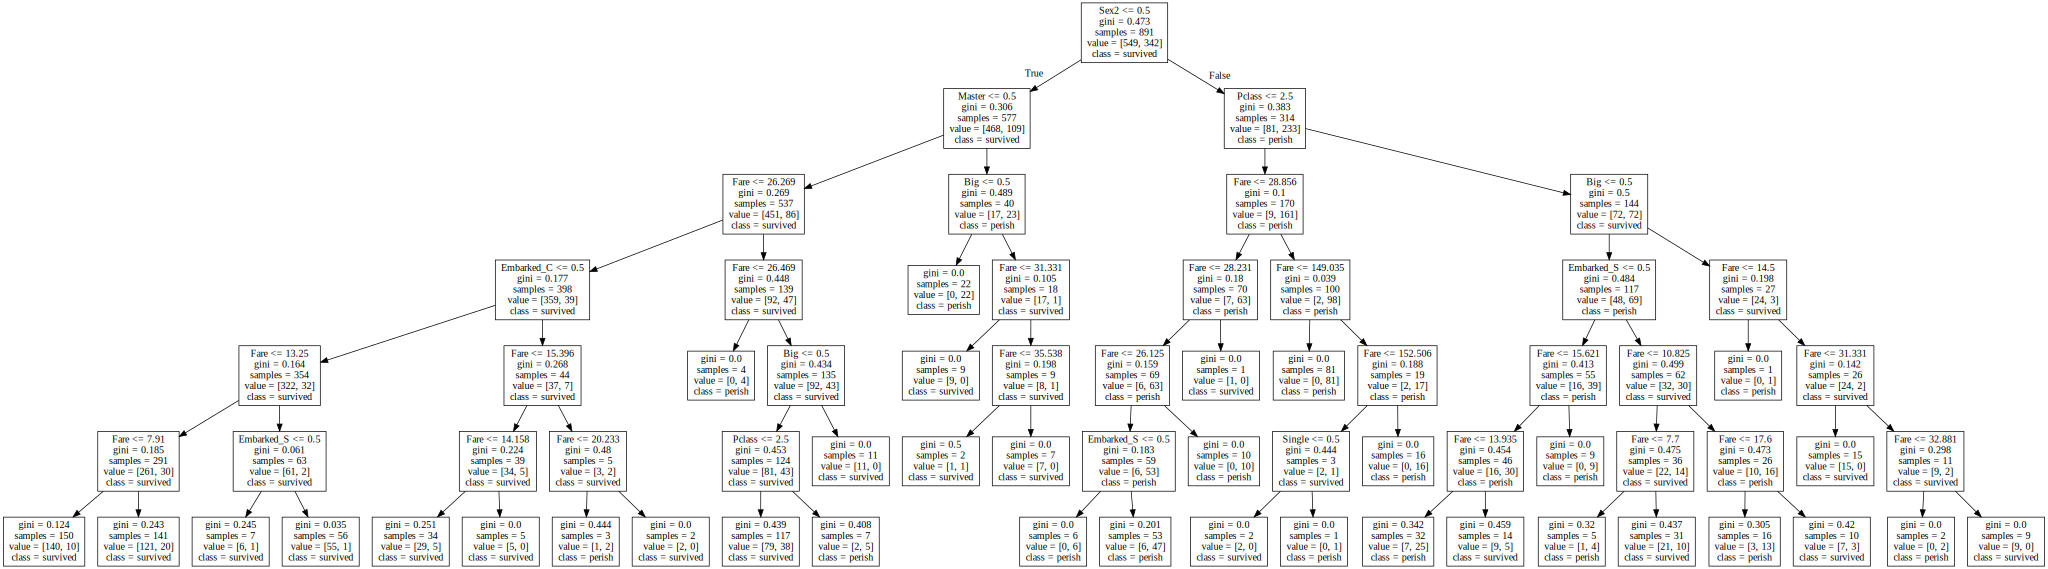

In [37]:
# DecisionTreeClassifier 모델에서 tree모델을 활성화해본다
import graphviz
from sklearn.tree import export_graphviz
mott=export_graphviz(model,feature_names=feature_names,class_names=["survived","perish"],out_file=None)
graphviz.Source(mott)

In [38]:
prediction=model.predict(x_test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Outperform

In [39]:
submit=pd.read_csv("Desktop/phthon/Kaggle/titanic/gender_submission.csv",index_col="PassengerId")
submit["Survived"]=prediction
submit[0:5]

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [40]:
submit.to_csv("Desktop/phthon/Kaggle/titanic/final3.csv")